# Wrangle and Analyze WeRateDogs Data
<br>

## Table of Contents
<ul>
<li><a href="#Gather">Gather</a></li>
<li><a href="#Assess">Assess</a></li>
<li><a href="#Clean">Clean</a></li>
</ul>

## Gather

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import time
import json

%matplotlib inline

### WeRateDogs Twitter archive

In [2]:
#Read csv file into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet Image Predictions                                                                                                                                              

In [3]:
#Download file programmmatically using requests library  
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [4]:
# Read tsv file into a DataFrame
twitter_image = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
twitter_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API

Query Twitter API using tweepy library

In [5]:
#OAuth 1a Authentication
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
#Query twitter API to get each tweets JSON data
tweet_data = {}
error_list = []

start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_data[str(tweet_id)] = tweet._json
    except Exception as e:
        print("Error for: " + str(tweet_id))
        error_list.append(tweet_id)

        
end = time.time()

print("Elapsed time:", end-start, "seconds")

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096


Rate limit reached. Sleeping for: 265


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 268


Elapsed time: 2200.0376858711243 seconds


In [7]:
print("Number of successful tweets", len(tweet_data))
print("Number of error tweets:", len(error_list))

Number of successful tweets 2331
Number of error tweets: 25


In [8]:
#Retry querying error tweets
error_list2 = []

for e in error_list:
    try:
        tweet = api.get_status(e, tweet_mode = 'extended')
        tweet_data[str(e)] = tweet._json
    except Exception:
        print("Error for: " + str(e))
        error_list2.append(tweet_id)

print("Number of error tweets:", len(error_list2))    

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Error for: 754011816964026368
Error for: 680055455951884288
Number of error tweets: 25


In [9]:
#Write JSON data to a file (https://docs.python.org/2/library/json.html)
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent = 4,
              ensure_ascii = True)

In [10]:
# Read JSON data in as a DataFrame 
with open('tweet_json.txt') as file:
    data = json.load(file)
    
tweets_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_list.append({'tweet_id': tweet_id, 
                             'retweets' : retweets,
                             'favorites': favourites,
                             'followers' : followers, 
                             'friends' : friends})
    
tweets_df = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_df.head()

,tweet_id,retweets,favorites,followers,friends
0,666020888022790149,462,2415,8783907,16
1,666029285002620928,42,121,8783907,16
2,666033412701032449,41,112,8783907,16
3,666044226329800704,132,272,8783907,16
4,666049248165822465,39,96,8783907,16


## Assess

### WeRateDogs Twitter archive

In [11]:
#Visually assess data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive.duplicated().sum()

0

In [15]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Kobe         1
Milky        1
Nigel        1
Binky        1
Jazz         1
Name: name, Length: 957, dtype: int64

### Tweet Image Predictions   

In [17]:
twitter_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
twitter_image.duplicated().sum()

0

In [28]:
twitter_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Twitter Api 

In [23]:
tweets_df

,tweet_id,retweets,favorites,followers,friends
0,666020888022790149,462,2415,8783907,16
1,666029285002620928,42,121,8783907,16
2,666033412701032449,41,112,8783907,16
3,666044226329800704,132,272,8783907,16
4,666049248165822465,39,96,8783907,16
...,...,...,...,...,...
2326,891327558926688256,8489,37743,8783992,16
2327,891689557279858688,7870,39531,8783992,16
2328,891815181378084864,3781,23538,8783992,16
2329,892177421306343426,5704,31260,8783992,16


In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [26]:
tweets_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [27]:
tweets_df.duplicated().sum()

0

#### **Quality** 
<br>

> Content Issues -  Completeness, Validity, Accuracy, Consistency

**_twitter archive_ table**
- The datatype of column _tweet_id_ is an integer not an object (str)
- The datatype of columns _timestamp_ and _retweeted_status_timestamp_ is an object not a datetime
- Columns _in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_ have missing data (null values)
- Column _name_ contains invalid names (i.e 'a', 'an', 'the', etc)
- Column _name_ has 'None'(str) values for null values
- Columns _rating_numerator_ and _rating_denominator_ contain invalid and inconsistent values
<br>

**_tweet image predictions_ table**
- The datatype of column _tweet_id_ is an object(str) not a integer
- The column names of _p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog_ are not descriptive
<br>

**_twitter API_ table**


<br>

####   **Tidiness**
> 1. Each variable forms a column.
> 2. Each observation forms a row.
> 3. Each type of observational unit forms a table.

- There are four columns _doggo, floofer, pupper, puppo_ that describe dog stage
- The three dataframes can be joined as a single dataframe

## Clean

In [357]:
# Make a Copy
twitter_archive_clean = twitter_archive.copy()
twitter_image_clean = twitter_image.copy()
tweets_df_clean = tweets_df.copy()

### WeRateDogs Twitter archive

> **The datatype of column _tweet_id_ is an integer not a object(str)**

#### Define
Change the datatype of column _tweet_id_ to an object(str).

#### Code

In [358]:
twitter_archive_clean['tweet_id']  = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [359]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> **The datatype of columns _timestamp_ and _retweeted_status_timestamp_ is an object not a datetime**

#### Define
Change the datatype of columns _timestamp_ and _retweeted_status_timestamp_ to datetime

#### Code

In [360]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [361]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtype

> **Columns _in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_ have missing data (null values)**

#### Define
Drop columns in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp_.

#### Code

In [362]:
twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id', 
                            'retweeted_status_id', 
                            'retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [363]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

> **Column _name_ contains invalid names (i.e 'a', 'an', 'the', etc)**

#### Define
Replace invalid names (starts with a lowercase) from the _name_ column to NaN

#### Code

In [364]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [365]:
not_names = ['a', 'an', 'by', 'the', 'just', 'mad', 'old', 'space', 'quite', 'actually',
                                    'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly','not',
                                    '0', 'life', 'one', 'his', 'very']

twitter_archive_clean.name.replace(not_names, np.NaN, inplace =True)

#### Test

In [366]:
print(twitter_archive_clean.info())
print(twitter_archive_clean.name.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2252 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](2), int64(2), object(9)
memory usage: 239.4+ KB
None
104


> **Columns _name, doggo, floofer, pupper, puppo_ have 'None'(str) values for null values**

#### Define
Change 'None' (str) values to NaN for columns _name, doggo, floofer, pupper, puppo_ 

#### Code

In [367]:
twitter_archive_clean.name.replace("None", np.nan, inplace = True)

#### Test

In [368]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1507 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns, UTC](2), int64(2), object(9)
memory usage: 239.4+ KB


> **Columns _rating_numerator_ and _rating_denominator_ contain invalid and inconsistent values**

#### Define
Columns _rating_numerator_ and _rating_denominator_ contain values from 0 to over a thousand. These values do  not  seem like errors. The large numbers are done intentionally for exaggeration and humor. I will leave these values as they are. 

#### Code

In [369]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [370]:
twitter_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Tweet Image Predictions

> **The datatype of column _tweet_id_ is an integer not a object(str)**

#### Define
Change the datatype of column _tweet_id_ to an object(str).

#### Code

In [371]:
twitter_image_clean['tweet_id']  = twitter_image_clean['tweet_id'].astype(str)

#### Test

In [372]:
twitter_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


> **The column names of _p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog_ are not descriptive**

#### Define
Change the column names of _p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog_ to a moreo descriptive and clear one

#### Code

In [373]:
twitter_image_clean = twitter_image_clean.rename(columns = {'p1': 'prediction_1',
                        'p1_conf':'prediction_1_confidence',
                        'p1_dog':'prediction_1_dog',
                        'p2': 'prediction_2',
                        'p2_conf':'prediction_2_confidence',
                        'p2_dog':'prediction_2_dog',
                        'p3': 'prediction_3',
                        'p3_conf':'prediction_3_confidence',
                        'p3_dog':'prediction_3_dog'})

#### Test

In [374]:
twitter_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_dog'],
      dtype='object')

> **The three dataframes can be joined as a single dataframe**

#### Define
Inner join the three dataframes into a single dataframe by _tweet_id

#### Code

In [375]:
twitter_final_clean = pd.merge(left = twitter_archive_clean, right = twitter_image_clean, 
                               left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

twitter_final_clean = pd.merge(left = twitter_final_clean, right = tweets_df_clean, 
                               left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [376]:
print(twitter_final_clean.columns)
print(twitter_final_clean.info())
twitter_final_clean.head()

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num',
       'prediction_1', 'prediction_1_confidence', 'prediction_1_dog',
       'prediction_2', 'prediction_2_confidence', 'prediction_2_dog',
       'prediction_3', 'prediction_3_confidence', 'prediction_3_dog',
       'retweets', 'favorites', 'followers', 'friends'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null object
timestamp                     2059 non-null datetime64[ns, UTC]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_timestamp    72 non-null datetime64[ns, UTC]
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
ra

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweets,favorites,followers,friends
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,bagel,0.085851,False,banana,0.076110,False,7718,36249,8783992,16
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,Pekinese,0.090647,True,papillon,0.068957,True,5704,31260,8783992,16
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,malamute,0.078253,True,kelpie,0.031379,True,3781,23538,8783992,16
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7870,39531,8783992,16
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8489,37743,8783992,16


> **There are four columns _doggo, floofer, pupper, puppo_ that describe dog stage**

#### Define
Melt the four columns _doggo, floofer, pupper, puppo_ into a single _dog_stage_ variable

#### Code

In [377]:
dog_stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']
other_columns = [x for x in twitter_final_clean.columns.tolist() if x not in dog_stage_columns]

twitter_final_clean = pd.melt(twitter_final_clean, id_vars = other_columns, 
                              value_vars = dog_stage_columns, var_name = 'stages',
                              value_name = 'dog_stage')

twitter_final_clean.drop(['stages'], axis=1, inplace=True)

In [378]:
twitter_final_clean = twitter_final_clean.drop_duplicates()
twitter_final_clean = twitter_final_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [379]:
twitter_final_clean.dog_stage.replace("None", np.nan, inplace = True)

#### Test

In [380]:
print(twitter_final_clean.info())
print(twitter_final_clean.dog_stage.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 7053
Data columns (total 25 columns):
tweet_id                      2059 non-null object
timestamp                     2059 non-null datetime64[ns, UTC]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_timestamp    72 non-null datetime64[ns, UTC]
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          1391 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
prediction_1                  2059 non-null object
prediction_1_confidence       2059 non-null float64
prediction_1_dog              2059 non-null bool
prediction_2                  2059 non-null object
prediction_2_confidence       2059 non-null float64
prediction_2_dog              2059 non-null bool
predict

### Store

In [381]:
twitter_final_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyze & Visualize

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [383]:
twitter_final_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'prediction_1', 'prediction_1_confidence',
       'prediction_1_dog', 'prediction_2', 'prediction_2_confidence',
       'prediction_2_dog', 'prediction_3', 'prediction_3_confidence',
       'prediction_3_dog', 'retweets', 'favorites', 'followers', 'friends',
       'dog_stage'],
      dtype='object')

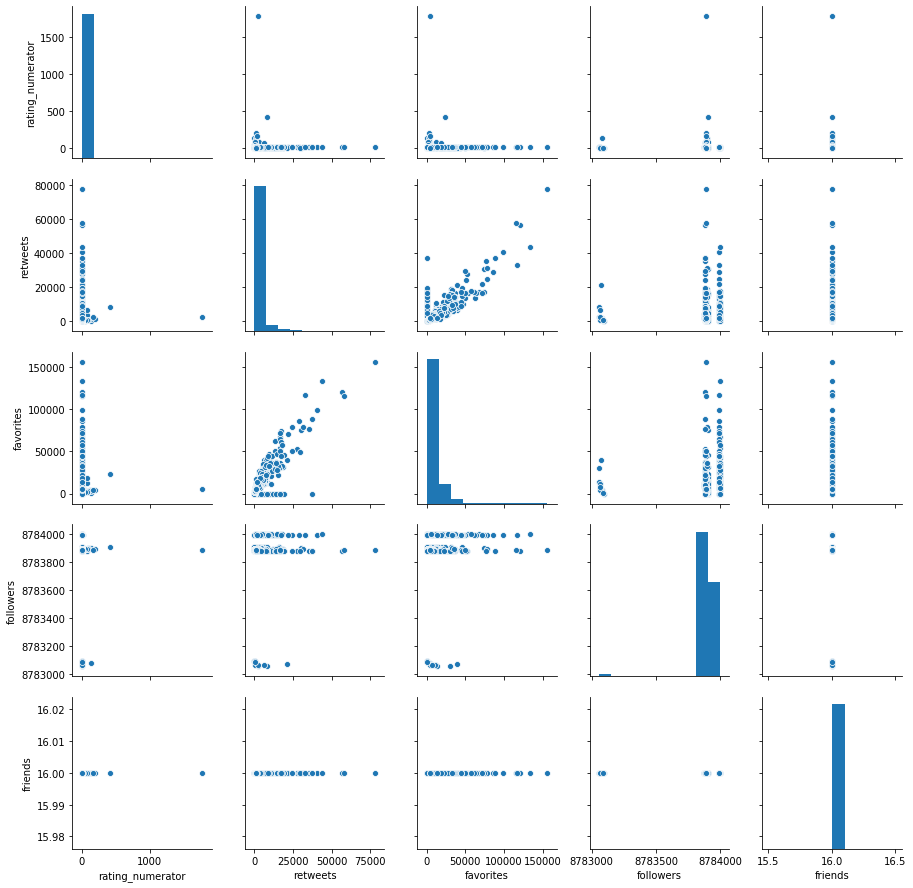

In [390]:
# Correlogram of variables rating_numerator, retweets, favorites, followers, friends
sns.pairplot(twitter_final_clean[['rating_numerator', 'retweets', 'favorites', 'followers', 'friends']], kind="scatter")
plt.show();

In [385]:
# Tweets with the most favorite counts 
twitter_final_clean.sort_values('favorites', ascending=False)[['tweet_id','prediction_1','favorites']].head()

,tweet_id,prediction_1,favorites
838,744234799360020481,Labrador_retriever,156351
6497,822872901745569793,Lakeland_terrier,133176
423,807106840509214720,Chihuahua,120812
4228,866450705531457537,French_bulldog,116535
873,739238157791694849,Eskimo_dog,115512


In [386]:
# Tweets with the most retweets
twitter_final_clean.sort_values('retweets', ascending=False)[['tweet_id','prediction_1','retweets']].head()

,tweet_id,prediction_1,retweets
838,744234799360020481,Labrador_retriever,77913
873,739238157791694849,Eskimo_dog,57761
423,807106840509214720,Chihuahua,56798
6497,822872901745569793,Lakeland_terrier,43883
59,879415818425184262,English_springer,40610


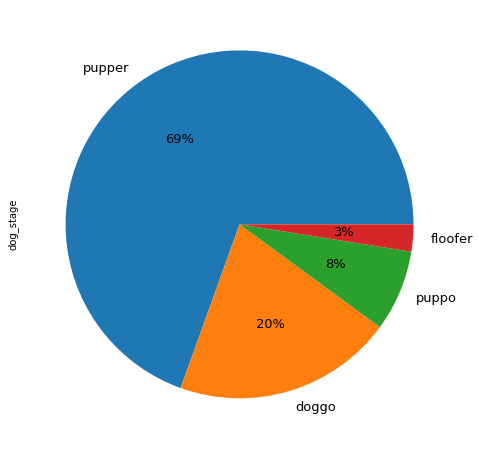

In [387]:
# Pie Chart of dog stage
twitter_final_clean.dog_stage.value_counts().plot.pie(figsize=(8, 8), autopct='%1.0f%%',
                                                      textprops={'fontsize': 13})

In [393]:
twitter_final_clean.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.938462
floofer    11.875000
pupper     10.773756
puppo      12.041667
Name: rating_numerator, dtype: float64

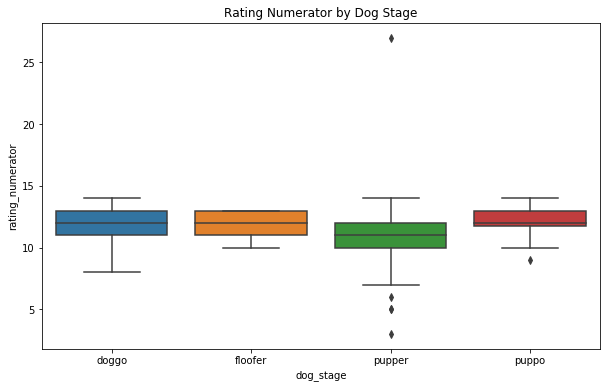

In [394]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "rating_numerator", 
            data = twitter_final_clean).set_title('Rating Numerator by Dog Stage');

In [395]:
twitter_final_clean.groupby('dog_stage')['favorites'].mean()

dog_stage
doggo      18028.092308
floofer    12546.750000
pupper      6644.619910
puppo      21073.083333
Name: favorites, dtype: float64

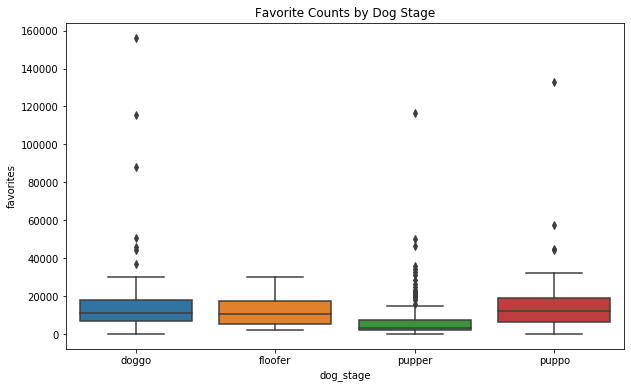

In [396]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "favorites", 
            data = twitter_final_clean).set_title('Favorite Counts by Dog Stage');

In [397]:
twitter_final_clean.groupby('dog_stage')['retweets'].mean()

dog_stage
doggo      7190.400000
floofer    4196.875000
pupper     2318.923077
puppo      6270.333333
Name: retweets, dtype: float64

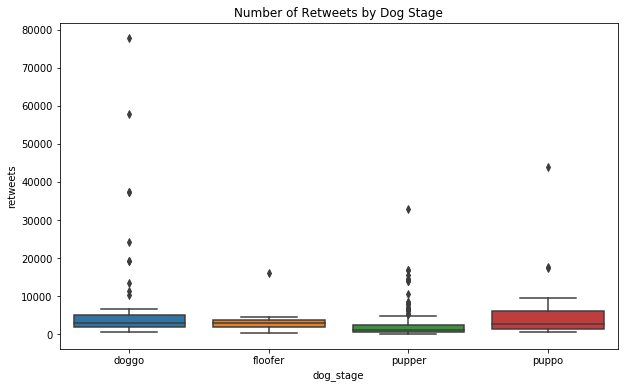

In [398]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "retweets", 
            data = twitter_final_clean).set_title('Number of Retweets by Dog Stage');